<a href="https://colab.research.google.com/github/nurrizkyimani/hierarchical_research/blob/main/Nurrizky_COPY_linus_hierarchical_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 68.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [4]:
#general
import pandas as pd
import numpy as np
import string
import math
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
tqdm.pandas()

#keras, tf, torch
import tensorflow as tf
from tensorflow import keras
import torch
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.models import *
from keras.layers import *
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
from keras.layers import Dropout
from keras import regularizers
from keras import backend as K

In [5]:
np.random.seed(2022)

In [7]:
path = '/content/drive/MyDrive/nlp_research/2022_research_hierarchical/'
current_dataset = 'linus_final_df_1.csv'

#df = pd.read_csv(path + 'twt_preprocessed_stop.csv', index_col=0).reset_index(drop=True)
df = pd.read_csv(path + current_dataset, index_col=0).reset_index(drop=True)

# Split Sentiment

In [8]:
df

,label,tweet,sentiment
0,anger,jln jatibarupolisi tdk bs gertak gubernur eman...,negative
1,anger,cewe lho kayak rasain sibuk jaga rasain sakit ...,negative
2,happy,kepingin gudeg mbarek bu hj amad foto google s...,positive
3,anger,jln jatibarubagian wilayah tn abangpengaturan ...,negative
4,happy,sharing alam kemarin jam batalin tiket stasiun...,positive
...,...,...,...
4368,love,papa mejam tahan gejolak batin papa tapu lagil...,positive
4369,fear,sulit calon wapresnya jokowi pilpres salah gem...,negative
4370,anger,nggak lha iya gimana coba lulus seni nari nari...,negative
4371,happy,beneran mahasiswa teknik ui nembak pacar pas s...,positive


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [10]:
X = df['tweet']
y = le.fit_transform(df['sentiment'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2022)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, stratify=y_test, test_size=0.5, random_state=2022)

In [11]:
X_train

3431    lg ngobrol kiya dek doain mamah dek blablabla ...
1908    alhamdulillahatas percaya klien psikotes calon...
2367    guru gw gin nih sampe nyumpahin gw dapet udah ...
3188                                               sayang
2197    sebenernya nggak isi medsosku from time to tim...
                              ...                        
1179    lagu kayak hits sih ensenang just give me reas...
1938    revisi revisi allah mantap sekaliiii emang dig...
3122    acara asik acara asikahan anak inisahurtiketco...
4301                                          gerah jalan
2273    happy mensive my love makasih udh nemenin udh ...
Name: tweet, Length: 3498, dtype: object

In [12]:
X_val

935     marah lampias hati ku hati kecewa moshing suru...
489     neng banget refreshing neng banget gitu cari u...
3016    sop dr bank bang sasar gak org langgan bank in...
2502    pengin bilang heiiii lo tuh nyaplok duit hak l...
3661    beli mobil harga sampe juta doi ganti head uni...
                              ...                        
1260    bodo bonek the jak gak akur kalo model jijik k...
653     elah gw jg kog hidup tngh kelilingin sodara ma...
1286    lepas krim dokter alias krim klinik alhamdulil...
2249    bundling tawar weekdays momentum hargaharga ho...
1906                yo yo wes sampean bener gak awas kalo
Name: tweet, Length: 437, dtype: object

In [13]:
X_test

1243                            kasihan nungu yah resulta
3154    berani lakilaki berani rumah gadis suka duduk ...
4323    malam pojok pilih jalan dapet dm kalo udah nia...
3864                           parah wonhee cantik banget
28      gimana nilai dr jilbabsyaringgak kadang gemez ...
                              ...                        
1761    gw sh sbnrnya susah banget nih lepas dr sedot ...
32      sungguh cinta berat pisah hadiahperasaan bikin...
3894    giat kantor pusat rencana tgl pulang tiket pul...
218     terima kasih tertawa moga amal soleh mulia ham...
3555    kadang suka gak terima kalo liat hidup we gak ...
Name: tweet, Length: 438, dtype: object

# ((LSTM Sentiment))

## 1.LSTM (embedding, lstm, flatten, dense)

In [101]:
MAX_SEQUENCE_LENGTH = 150
MAX_NB_WORDS = 2000
EMBEDDING_DIM=300

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

In [102]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
y = np.asarray(y_train)
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y.shape)

Found 12701 unique tokens.
Shape of data tensor: (3498, 150)
Shape of label tensor: (3498,)


In [103]:
X_val

935     marah lampias hati ku hati kecewa moshing suru...
489     neng banget refreshing neng banget gitu cari u...
3016    sop dr bank bang sasar gak org langgan bank in...
2502    pengin bilang heiiii lo tuh nyaplok duit hak l...
3661    beli mobil harga sampe juta doi ganti head uni...
                              ...                        
1260    bodo bonek the jak gak akur kalo model jijik k...
653     elah gw jg kog hidup tngh kelilingin sodara ma...
1286    lepas krim dokter alias krim klinik alhamdulil...
2249    bundling tawar weekdays momentum hargaharga ho...
1906                yo yo wes sampean bener gak awas kalo
Name: tweet, Length: 437, dtype: object

In [104]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_val)
sequences = tokenizer.texts_to_sequences(X_val)

In [105]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X_val_seq = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
y_val_seq = np.asarray(y_val)
print('Shape of data tensor:', X_val_seq.shape)
print('Shape of label tensor:', y_val_seq.shape)

Found 3213 unique tokens.
Shape of data tensor: (437, 150)
Shape of label tensor: (437,)


In [ ]:
from gensim.models.fasttext import load_facebook_model

ft = load_facebook_model(path + 'pretrained_word_embedding/fastext_model_tweet.bin')

In [107]:
ft.vector_size

100

In [108]:
embedding_matrix_ft = np.random.random((len(tokenizer.word_index) + 1, ft.vector_size))

In [109]:
for word,i in tokenizer.word_index.items():
    try:
        embedding_matrix_ft[i] = ft.wv[word]
    except:
        pass

In [110]:
X

array([[   0,    0,    0, ...,  458,   83,  273],
       [   0,    0,    0, ...,   22,  416, 1027],
       [   0,    0,    0, ...,  537,    4,   87],
       ...,
       [   0,    0,    0, ...,  472,   13,  975],
       [   0,    0,    0, ...,    0,    0,   22],
       [   0,    0,    0, ...,  106,  650,    4]], dtype=int32)

In [111]:
initial_lr = 0.001
epochs = 100
decay = initial_lr/epochs
batch_size = 32

In [112]:
# text_seq_input = Input(shape=(MAX_SENT_LEN,), dtype='int32')
# text_embedding = Embedding(vocab_size, WORD_EMB_SIZE, input_length=MAX_SENT_LEN,
                            # weights=[trained_embeddings], trainable=True)(text_seq_input)

MAX_SENT_LEN=X.shape[1]

# text_seq_input = Input(shape=(MAX_SENT_LEN,), dtype='int32')
# text_embedding = (Embedding(len(tokenizer.word_index)+1, ft.vector_size, weights=[embedding_matrix_ft], input_length=MAX_SENT_LEN))(text_seq_input)                            

model = Sequential([
    Embedding(len(tokenizer.word_index)+1, ft.vector_size, weights=[embedding_matrix_ft], input_length=MAX_SENT_LEN),
    LSTM(32, return_sequences=True),
    Flatten(),
    Dense(9, activation='softmax')
])

opt = tf.keras.optimizers.Adam(clipvalue=1.0)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])
# dis_model_1.summary()


model = Sequential()
#model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Embedding(len(tokenizer.word_index)+1, ft.vector_size, weights=[embedding_matrix_ft], input_length=X.shape[1]))
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
model.add(LSTM(64, 
               dropout=0.2, 
               recurrent_dropout=0.2,
               #kernel_initializer = 'glorot_uniform',
               #kernel_regularizer = regularizers.l2(0.001),
               #bias_regularizer = regularizers.l2(0.001),
               #recurrent_regularizer = regularizers.l2(0.001), 
               return_sequences = True))
#model.add(BatchNormalization())
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(GlobalMaxPool1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
#model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
#opt = tf.keras.optimizers.Adam(clipvalue=1.0)
opt = tf.keras.optimizers.RMSprop(lr=initial_lr, clipvalue=1.0)
#opt = tf.keras.optimizers.SGD(lr=initial_lr, momentum=0.9, clipvalue=1.0)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [113]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 150, 100)          321400    
                                                                 
 lstm_7 (LSTM)               (None, 150, 64)           42240     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                      

In [114]:
def lr_time_based_decay(epoch, lr):
            return lr * 1 / (1 + decay * epoch)

In [115]:
es = EarlyStopping(monitor = 'val_loss', mode = "auto", patience = 10, restore_best_weights = True)

In [ ]:
#history = model.fit(X, y, epochs=epochs, validation_data = (X_val_seq, y_val_seq), batch_size=batch_size, callbacks = es)
history = model.fit(X, y, epochs=epochs, validation_data = (X_val_seq, y_val_seq), batch_size=batch_size, callbacks = [LearningRateScheduler(lr_time_based_decay, verbose = 1), es])


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
110/110 [==============================] - 59s 235ms/step - loss: 0.6545 - accuracy: 0.6266 - val_loss: 0.6609 - val_accuracy: 0.6339 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999900475969753.
Epoch 2/100
110/110 [==============================] - 23s 213ms/step - loss: 0.5773 - accuracy: 0.7095 - val_loss: 0.7809 - val_accuracy: 0.6430 - lr: 9.9999e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0009999700363790467.
Epoch 3/100
 83/110 [=====================>........] - ETA: 5s - loss: 0.4958 - accuracy: 0.7692

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
X_test

In [ ]:
X_test.to_list()[0]

In [ ]:
new_tweet = X_test.to_list()
seq = tokenizer.texts_to_sequences(new_tweet)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['sentiment']

In [ ]:
pred.shape

In [ ]:
for i, j in enumerate(pred):
  pred[i] = np.rint(j)
y_test_pred = pred.astype(int)

In [ ]:
y_test

## 2.BiLSTM GlobalMaxPool

In [ ]:
MAX_SEQUENCE_LENGTH = 150
MAX_NB_WORDS = 2000
EMBEDDING_DIM=300

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
y = np.asarray(y_train)
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y.shape)

Found 12701 unique tokens.
Shape of data tensor: (3498, 150)
Shape of label tensor: (3498,)


In [ ]:
X_val

935     marah lampias hati ku hati kecewa moshing suru...
489     neng banget refreshing neng banget gitu cari u...
3016    sop dr bank bang sasar gak org langgan bank in...
2502    pengin bilang heiiii lo tuh nyaplok duit hak l...
3661    beli mobil harga sampe juta doi ganti head uni...
                              ...                        
1260    bodo bonek the jak gak akur kalo model jijik k...
653     elah gw jg kog hidup tngh kelilingin sodara ma...
1286    lepas krim dokter alias krim klinik alhamdulil...
2249    bundling tawar weekdays momentum hargaharga ho...
1906                yo yo wes sampean bener gak awas kalo
Name: tweet, Length: 437, dtype: object

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_val)
sequences = tokenizer.texts_to_sequences(X_val)

In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X_val_seq = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
y_val_seq = np.asarray(y_val)
print('Shape of data tensor:', X_val_seq.shape)
print('Shape of label tensor:', y_val_seq.shape)

Found 3213 unique tokens.
Shape of data tensor: (437, 150)
Shape of label tensor: (437,)


In [ ]:
from gensim.models.fasttext import load_facebook_model

ft = load_facebook_model(path + 'pretrained_word_embedding/fastext_model_tweet.bin')

In [ ]:
ft.vector_size

100

In [ ]:
embedding_matrix_ft = np.random.random((len(tokenizer.word_index) + 1, ft.vector_size))

In [ ]:
for word,i in tokenizer.word_index.items():
    try:
        embedding_matrix_ft[i] = ft.wv[word]
    except:
        pass

In [ ]:
X

array([[   0,    0,    0, ...,  458,   83,  273],
       [   0,    0,    0, ...,   22,  416, 1027],
       [   0,    0,    0, ...,  537,    4,   87],
       ...,
       [   0,    0,    0, ...,  472,   13,  975],
       [   0,    0,    0, ...,    0,    0,   22],
       [   0,    0,    0, ...,  106,  650,    4]], dtype=int32)

In [ ]:
initial_lr = 0.001
epochs = 100
decay = initial_lr/epochs
batch_size = 32

In [ ]:
model = Sequential()
#model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Embedding(len(tokenizer.word_index)+1, ft.vector_size, weights=[embedding_matrix_ft], input_length=X.shape[1]))
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
model.add(Bidirectional(LSTM(256, 
               dropout=0.2, 
               recurrent_dropout=0.2, 
               return_sequences = True)))
#model.add(BatchNormalization())
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
#model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(clipvalue=1.0)
#opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, clipvalue=1.0)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 150, 100)          321400    
                                                                 
 bidirectional (Bidirectiona  (None, 150, 512)         731136    
 l)                                                              
                                                                 
 global_max_pooling1d_3 (Glo  (None, 512)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 128)               65664     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1)               

In [ ]:
def lr_time_based_decay(epoch, lr):
            return lr * 1 / (1 + decay * epoch)

In [ ]:
es = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience = 10, restore_best_weights = True)

In [ ]:
history = model.fit(X, y, epochs=epochs, validation_data = (X_val_seq, y_val_seq), batch_size=batch_size, callbacks = es)

Epoch 1/100
110/110 [==============================] - 288s 3s/step - loss: 0.6471 - accuracy: 0.6346 - val_loss: 0.6817 - val_accuracy: 0.6430
Epoch 2/100
110/110 [==============================] - 269s 2s/step - loss: 0.5121 - accuracy: 0.7553 - val_loss: 0.8312 - val_accuracy: 0.5446
Epoch 3/100
110/110 [==============================] - 274s 2s/step - loss: 0.3732 - accuracy: 0.8422 - val_loss: 0.9785 - val_accuracy: 0.5904
Epoch 4/100
110/110 [==============================] - 279s 3s/step - loss: 0.2934 - accuracy: 0.8811 - val_loss: 1.2122 - val_accuracy: 0.5378
Epoch 5/100
110/110 [==============================] - 265s 2s/step - loss: 0.2487 - accuracy: 0.8988 - val_loss: 1.1665 - val_accuracy: 0.5721
Epoch 6/100
110/110 [==============================] - 278s 3s/step - loss: 0.2106 - accuracy: 0.9214 - val_loss: 1.2721 - val_accuracy: 0.5973
Epoch 7/100
110/110 [==============================] - 260s 2s/step - loss: 0.1727 - accuracy: 0.9362 - val_loss: 1.4553 - val_accuracy:

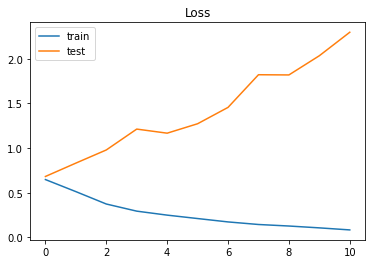

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

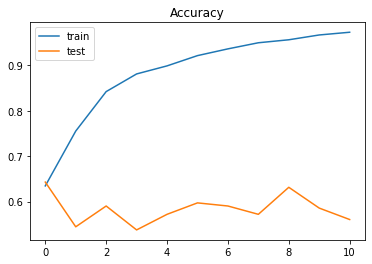

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
X_test

1243                            kasihan nungu yah resulta
3154    berani lakilaki berani rumah gadis suka duduk ...
4323    malam pojok pilih jalan dapet dm kalo udah nia...
3864                           parah wonhee cantik banget
28      gimana nilai dr jilbabsyaringgak kadang gemez ...
                              ...                        
1761    gw sh sbnrnya susah banget nih lepas dr sedot ...
32      sungguh cinta berat pisah hadiahperasaan bikin...
3894    giat kantor pusat rencana tgl pulang tiket pul...
218     terima kasih tertawa moga amal soleh mulia ham...
3555    kadang suka gak terima kalo liat hidup we gak ...
Name: tweet, Length: 438, dtype: object

In [ ]:
X_test.to_list()[0]

'kasihan nungu yah resulta'

In [ ]:
new_tweet = X_test.to_list()
seq = tokenizer.texts_to_sequences(new_tweet)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['sentiment']

In [ ]:
pred.shape

(438, 1)

In [ ]:
for i, j in enumerate(pred):
  pred[i] = np.rint(j)
y_test_pred = pred.astype(int)

In [ ]:
y_test

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
y_test_pred

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

# ((CNN Sentiment))

## 1.CNN Conv-Pool ( convolutional→ maxpol  ) * 3 → Dense. 

In [39]:
MAX_SEQUENCE_LENGTH = 150
MAX_NB_WORDS = 2000
EMBEDDING_DIM=300

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

In [40]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
y = np.asarray(y_train)
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y.shape)

Found 12701 unique tokens.
Shape of data tensor: (3498, 150)
Shape of label tensor: (3498,)


In [41]:
X_val

935     marah lampias hati ku hati kecewa moshing suru...
489     neng banget refreshing neng banget gitu cari u...
3016    sop dr bank bang sasar gak org langgan bank in...
2502    pengin bilang heiiii lo tuh nyaplok duit hak l...
3661    beli mobil harga sampe juta doi ganti head uni...
                              ...                        
1260    bodo bonek the jak gak akur kalo model jijik k...
653     elah gw jg kog hidup tngh kelilingin sodara ma...
1286    lepas krim dokter alias krim klinik alhamdulil...
2249    bundling tawar weekdays momentum hargaharga ho...
1906                yo yo wes sampean bener gak awas kalo
Name: tweet, Length: 437, dtype: object

In [42]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_val)
sequences = tokenizer.texts_to_sequences(X_val)

In [43]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X_val_seq = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
y_val_seq = np.asarray(y_val)
print('Shape of data tensor:', X_val_seq.shape)
print('Shape of label tensor:', y_val_seq.shape)

Found 3213 unique tokens.
Shape of data tensor: (437, 150)
Shape of label tensor: (437,)


In [44]:
from gensim.models.fasttext import load_facebook_model

ft = load_facebook_model(path + 'pretrained_word_embedding/fastext_model_tweet.bin')

In [45]:
ft.vector_size

100

In [46]:
embedding_matrix_ft = np.random.random((len(tokenizer.word_index) + 1, ft.vector_size))

In [47]:
for word,i in tokenizer.word_index.items():
    try:
        embedding_matrix_ft[i] = ft.wv[word]
    except:
        pass

In [48]:
X

array([[   0,    0,    0, ...,  458,   83,  273],
       [   0,    0,    0, ...,   22,  416, 1027],
       [   0,    0,    0, ...,  537,    4,   87],
       ...,
       [   0,    0,    0, ...,  472,   13,  975],
       [   0,    0,    0, ...,    0,    0,   22],
       [   0,    0,    0, ...,  106,  650,    4]], dtype=int32)

In [49]:
initial_lr = 0.001
epochs = 100
decay = initial_lr/epochs
batch_size = 32

In [50]:

MAX_TEXT_LEN = X.shape[1]

text_seq_input = Input(shape=(MAX_TEXT_LEN,), dtype='int32')
text_embedding = Embedding(len(tokenizer.word_index)+1, ft.vector_size, weights=[embedding_matrix_ft], input_length=X.shape[1])(text_seq_input)

filter_sizes = [3,4,5]
convs = []
for filter_size in filter_sizes:
    l_conv = Conv1D(filters=128, kernel_size=filter_size, padding='same', activation='relu')(text_embedding)
    l_pool = MaxPool1D(filter_size)(l_conv)
    convs.append(l_pool)


l_merge = Concatenate(axis=1)(convs)
l_cov1= Conv1D(128, 5, activation='relu')(l_merge)
l_pool1 = MaxPool1D(100)(l_cov1)
l_flat = Flatten()(l_pool1)
l_dense = Dense(128, activation='relu')(l_flat)
l_out = Dense(9, activation='softmax')(l_dense)
model_1 = Model(inputs=[text_seq_input], outputs=l_out)

opt = tf.keras.optimizers.Adam(clipvalue=1.0)

model_1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])


In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          321400    
                                                                 
 lstm (LSTM)                 (None, 150, 64)           42240     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                        

In [52]:
def lr_time_based_decay(epoch, lr):
            return lr * 1 / (1 + decay * epoch)

In [53]:
es = EarlyStopping(monitor = 'val_loss', mode = "auto", patience = 10, restore_best_weights = True)

In [54]:
history = model.fit(X, y, epochs=epochs, validation_data = (X_val_seq, y_val_seq), batch_size=batch_size, callbacks = es)

Epoch 1/100
110/110 [==============================] - 24s 220ms/step - loss: 0.2864 - accuracy: 0.8839 - val_loss: 1.1224 - val_accuracy: 0.5904
Epoch 2/100
110/110 [==============================] - 24s 218ms/step - loss: 0.2608 - accuracy: 0.8959 - val_loss: 1.1137 - val_accuracy: 0.5561
Epoch 3/100
110/110 [==============================] - 23s 214ms/step - loss: 0.2402 - accuracy: 0.9085 - val_loss: 1.2029 - val_accuracy: 0.5973
Epoch 4/100
110/110 [==============================] - 23s 213ms/step - loss: 0.2200 - accuracy: 0.9174 - val_loss: 1.2672 - val_accuracy: 0.6156
Epoch 5/100
110/110 [==============================] - 23s 211ms/step - loss: 0.2111 - accuracy: 0.9211 - val_loss: 1.1988 - val_accuracy: 0.5881
Epoch 6/100
110/110 [==============================] - 23s 214ms/step - loss: 0.1882 - accuracy: 0.9288 - val_loss: 1.4263 - val_accuracy: 0.6156
Epoch 7/100
110/110 [==============================] - 23s 213ms/step - loss: 0.1669 - accuracy: 0.9414 - val_loss: 1.4944 -

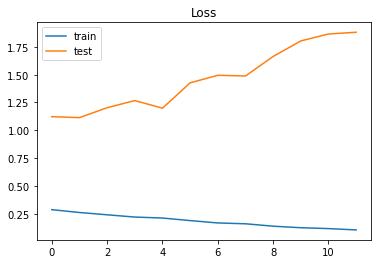

In [55]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

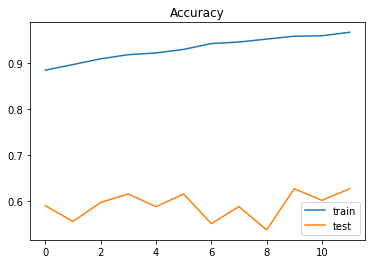

In [56]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [57]:
X_test

1243                            kasihan nungu yah resulta
3154    berani lakilaki berani rumah gadis suka duduk ...
4323    malam pojok pilih jalan dapet dm kalo udah nia...
3864                           parah wonhee cantik banget
28      gimana nilai dr jilbabsyaringgak kadang gemez ...
                              ...                        
1761    gw sh sbnrnya susah banget nih lepas dr sedot ...
32      sungguh cinta berat pisah hadiahperasaan bikin...
3894    giat kantor pusat rencana tgl pulang tiket pul...
218     terima kasih tertawa moga amal soleh mulia ham...
3555    kadang suka gak terima kalo liat hidup we gak ...
Name: tweet, Length: 438, dtype: object

In [58]:
X_test.to_list()[0]

'kasihan nungu yah resulta'

In [59]:
new_tweet = X_test.to_list()
seq = tokenizer.texts_to_sequences(new_tweet)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['sentiment']

In [60]:
pred.shape

(438, 1)

In [61]:
for i, j in enumerate(pred):
  pred[i] = np.rint(j)
y_test_pred = pred.astype(int)

In [62]:
y_test

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,

In [63]:
y_test_pred

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
    

# Evaluation Sentiment

In [64]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [65]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.63      0.62       273
           1       0.37      0.36      0.37       165

    accuracy                           0.53       438
   macro avg       0.49      0.50      0.49       438
weighted avg       0.53      0.53      0.53       438



In [66]:
print(accuracy_score(y_test, y_test_pred), f1_score(y_test, y_test_pred, average='weighted'), f1_score(y_test, y_test_pred, average='macro'), f1_score(y_test, y_test_pred, average='micro'))

0.5273972602739726 0.5265206221143566 0.4949616483681757 0.5273972602739726


In [67]:
print(accuracy_score(y_test, y_test_pred))
print(f1_score(y_test, y_test_pred, average='weighted'))
print(f1_score(y_test, y_test_pred, average='macro'))
print(f1_score(y_test, y_test_pred, average='micro'))

0.5273972602739726
0.5265206221143566
0.4949616483681757
0.5273972602739726


In [68]:
#aaa

# Split Postive Emot

In [ ]:
df

,label,tweet,sentiment
0,anger,jln jatibarupolisi tdk bs gertak gubernur eman...,negative
1,anger,cewe lho kayak rasain sibuk jaga rasain sakit ...,negative
2,happy,kepingin gudeg mbarek bu hj amad foto google s...,positive
3,anger,jln jatibarubagian wilayah tn abangpengaturan ...,negative
4,happy,sharing alam kemarin jam batalin tiket stasiun...,positive
...,...,...,...
4368,love,papa mejam tahan gejolak batin papa tapu lagil...,positive
4369,fear,sulit calon wapresnya jokowi pilpres salah gem...,negative
4370,anger,nggak lha iya gimana coba lulus seni nari nari...,negative
4371,happy,beneran mahasiswa teknik ui nembak pacar pas s...,positive


In [ ]:
df_pos = df.loc[df['sentiment']=='positive']

In [ ]:
df_pos

,label,tweet,sentiment
2,happy,kepingin gudeg mbarek bu hj amad foto google s...,positive
4,happy,sharing alam kemarin jam batalin tiket stasiun...,positive
6,happy,sharing temen tuh emg bgt lu ngerasa lu berat ...,positive
12,happy,syukur doa kakek karno anakanak yatim piatu bu...,positive
16,love,hadir tuk aman nyaman hormat,positive
...,...,...,...
4358,love,apaa eh sengaja tu sayang dah baca ku sayang t...,positive
4360,love,asa cinta sayang nyaman tenang hati,positive
4362,love,sayang skz super talented kaget mas umur motiv...,positive
4368,love,papa mejam tahan gejolak batin papa tapu lagil...,positive


In [ ]:
from sklearn import preprocessing
le_pos = preprocessing.LabelEncoder()

In [ ]:
X_pos = df_pos['tweet']
y_pos = le_pos.fit_transform(df_pos['label'])

from sklearn.model_selection import train_test_split
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X_pos, y_pos, stratify=y_pos, test_size=0.2, random_state=2022)
X_val_pos, X_test_pos, y_val_pos, y_test_pos = train_test_split(X_test_pos, y_test_pos, stratify=y_test_pos, test_size=0.5, random_state=2022)

In [ ]:
X_train_pos

4107    hueee sayang guaaa melow gin sihhh love aaahhh...
958     alhamdulillah makan sahur bareng mbah gugel wa...
3618    nek sinh mas drumer kui yo cinta indah no kena...
721     oldmoneygakngerasain pasang raut pensil cermin...
2531    jatuh cinta banget poni samping sayang senyum ...
                              ...                        
1057    moga tuhan senantiasa langkah hubung kuat uji ...
1384    ramadhan malam mulia dr ribu selamat lailatul ...
2071    dg menggunakn sistem demokrasi bgtulah jlnnya ...
1179    lagu kayak hits sih ensenang just give me reas...
480     wozniacki out daria kasatkina lhoomainnya gend...
Name: tweet, Length: 1313, dtype: object

In [ ]:
X_val_pos

3420    armyyyyyy bilang sayang kaliannnnnnn huhuhuhu ...
2238         sayang cuman km mas nafas oksigen mas sayang
3321    yuuuk siap berihtikaf malam terakhirmudah an m...
3416    luk adek sayang sabar adek hamil emosi mulu ba...
3649    salah kalo joget minum minum cantik kecuali cl...
                              ...                        
2141    congraduation angela merici akuu sedih sih yaa...
1358    alhamdulillah indonesia milik allah moga rahma...
3872    hahaha bodo deehhh video frame danielsayang ba...
2663    huwawawaaaaaa tanoshimidesuuu pribadi sayang b...
3864                           parah wonhee cantik banget
Name: tweet, Length: 164, dtype: object

In [ ]:
X_test_pos

1336    manusia polisi jaga tugas makam mantan preside...
3909    terimakasih ajar cinta kasih pandang banding j...
258     bangun tidur dapet kabar temen terima sujud sy...
4089    sadar kuat emak doa anak emang ken salah anak ...
2600    cinta ttg pasanganmujauh cinta tumbuh rumahcin...
                              ...                        
4315    sejarah indonesia ajar ajar islam indonesia da...
809     gin nih klo siluman bukber foto kaga bener uda...
2604    surga dunia kamar serasa beneran surga akhirat...
1040    hehehee pengepo alhamdulillah da kabar mlika w...
3688    yoon jisung asli ganteng drpda foto emang peso...
Name: tweet, Length: 165, dtype: object

# CNN Positive Emot

In [ ]:
df_pos

,label,tweet,sentiment
2,happy,kepingin gudeg mbarek bu hj amad foto google s...,positive
4,happy,sharing alam kemarin jam batalin tiket stasiun...,positive
6,happy,sharing temen tuh emg bgt lu ngerasa lu berat ...,positive
12,happy,syukur doa kakek karno anakanak yatim piatu bu...,positive
16,love,hadir tuk aman nyaman hormat,positive
...,...,...,...
4358,love,apaa eh sengaja tu sayang dah baca ku sayang t...,positive
4360,love,asa cinta sayang nyaman tenang hati,positive
4362,love,sayang skz super talented kaget mas umur motiv...,positive
4368,love,papa mejam tahan gejolak batin papa tapu lagil...,positive


In [ ]:
MAX_SEQUENCE_LENGTH = 150
MAX_NB_WORDS = 2000
EMBEDDING_DIM=300

tokenizer_pos = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer_pos.fit_on_texts(X_train_pos)
sequences_pos = tokenizer_pos.texts_to_sequences(X_train_pos)

In [ ]:
word_index_pos = tokenizer_pos.word_index
print('Found %s unique tokens.' % len(word_index_pos))
X_pos = pad_sequences(sequences_pos, maxlen=MAX_SEQUENCE_LENGTH)
y_pos = np.asarray(y_train_pos)
print('Shape of data tensor:', X_pos.shape)
print('Shape of label tensor:', y_pos.shape)

Found 6525 unique tokens.
Shape of data tensor: (1313, 150)
Shape of label tensor: (1313,)


In [ ]:
tokenizer_pos2 = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer_pos2.fit_on_texts(X_val_pos)
sequences_pos = tokenizer_pos2.texts_to_sequences(X_val_pos)

In [ ]:
word_index_pos = tokenizer_pos.word_index
print('Found %s unique tokens.' % len(word_index_pos))
X_val_seq_pos = pad_sequences(sequences_pos, maxlen=MAX_SEQUENCE_LENGTH)
y_val_seq_pos = np.asarray(y_val_pos)
print('Shape of data tensor:', X_val_seq_pos.shape)
print('Shape of label tensor:', y_val_seq_pos.shape)

Found 6525 unique tokens.
Shape of data tensor: (164, 150)
Shape of label tensor: (164,)


In [ ]:
from gensim.models.fasttext import load_facebook_model

ft = load_facebook_model(path + 'pretrained_word_embedding/fastext_model_tweet.bin')

In [ ]:
ft.vector_size

100

In [ ]:
embedding_matrix_ft_pos = np.random.random((len(tokenizer_pos.word_index) + 1, ft.vector_size))

In [ ]:
for word,i in tokenizer_pos.word_index.items():
    try:
        embedding_matrix_ft_pos[i] = ft.wv[word]
    except:
        pass

In [ ]:
embedding_matrix_ft_pos.shape

(6526, 100)

In [ ]:
embedding_matrix_ft_pos

array([[ 0.8349747 ,  0.57884645,  0.67783896, ...,  0.53306474,
         0.98590813,  0.3628312 ],
       [-0.25671762,  0.1352831 ,  0.2528244 , ..., -0.02192027,
         0.29505074, -0.7883265 ],
       [ 0.00823545, -0.18591729,  0.1138071 , ...,  0.00780953,
         0.19450246, -0.23759556],
       ...,
       [ 0.20084606, -0.14296155,  0.06375878, ..., -0.01146012,
        -0.23777874, -0.41602939],
       [ 0.01027974,  0.73587084,  0.32161283, ...,  0.1015126 ,
         0.91336185,  0.45722887],
       [-0.17897616,  0.36661547, -0.24301994, ..., -0.00524975,
         0.15747014,  0.09468712]])

In [ ]:
initial_lr = 0.001
epochs = 100
decay = initial_lr/epochs
batch_size = 32

In [ ]:
model_pos = Sequential()
#model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model_pos.add(Embedding(len(tokenizer.word_index)+1, ft.vector_size, weights=[embedding_matrix_ft], input_length=X_pos.shape[1]))
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
model_pos.add(Conv1D(128, 3, padding='same'))
#model.add(BatchNormalization())
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_pos.add(GlobalAvgPool1D())
#model.add(Dense(128, activation='relu'))
model_pos.add(Dropout(0.2))
#model.add(Flatten())
model_pos.add(Dense(2, activation='softmax'))
opt = tf.keras.optimizers.Adam(clipvalue=1.0)
#opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, clipvalue=1.0)
model_pos.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model_pos.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 150, 100)          1270200   
                                                                 
 conv1d_9 (Conv1D)           (None, 150, 128)          38528     
                                                                 
 global_average_pooling1d_9   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 2)                 258       
                                                                 
Total params: 1,308,986
Trainable params: 1,308,986
Non-trainable params: 0
___________________________________________

In [ ]:
def lr_time_based_decay(epoch, lr):
            return lr * 1 / (1 + decay * epoch)

In [ ]:
es = EarlyStopping(monitor = 'val_loss', mode = "auto", patience = 10, restore_best_weights = True)

In [ ]:
history_pos = model_pos.fit(X_pos, y_pos, epochs=epochs, validation_data = (X_val_seq_pos, y_val_seq_pos), batch_size=batch_size, callbacks = es)

Epoch 1/100
42/42 [==============================] - 3s 59ms/step - loss: 0.7414 - accuracy: 0.5423 - val_loss: 0.6709 - val_accuracy: 0.6159
Epoch 2/100
42/42 [==============================] - 4s 92ms/step - loss: 0.7107 - accuracy: 0.5743 - val_loss: 0.6762 - val_accuracy: 0.6159
Epoch 3/100
42/42 [==============================] - 4s 85ms/step - loss: 0.6723 - accuracy: 0.5994 - val_loss: 0.6650 - val_accuracy: 0.6159
Epoch 4/100
42/42 [==============================] - 2s 46ms/step - loss: 0.7028 - accuracy: 0.5857 - val_loss: 0.7254 - val_accuracy: 0.6159
Epoch 5/100
42/42 [==============================] - 2s 46ms/step - loss: 0.7398 - accuracy: 0.5545 - val_loss: 0.7948 - val_accuracy: 0.6159
Epoch 6/100
42/42 [==============================] - 2s 47ms/step - loss: 0.6568 - accuracy: 0.6245 - val_loss: 0.6610 - val_accuracy: 0.6159
Epoch 7/100
42/42 [==============================] - 2s 46ms/step - loss: 0.6104 - accuracy: 0.6565 - val_loss: 0.6458 - val_accuracy: 0.6159
Epoch 

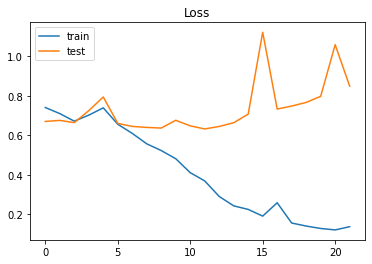

In [ ]:
plt.title('Loss')
plt.plot(history_pos.history['loss'], label='train')
plt.plot(history_pos.history['val_loss'], label='test')
plt.legend()
plt.show()

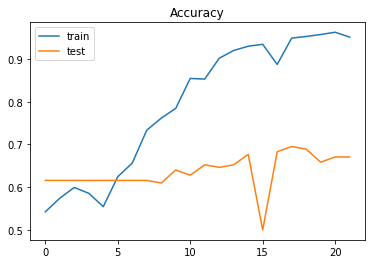

In [ ]:
plt.title('Accuracy')
plt.plot(history_pos.history['accuracy'], label='train')
plt.plot(history_pos.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
X_test_pos

1336    manusia polisi jaga tugas makam mantan preside...
3909    terimakasih ajar cinta kasih pandang banding j...
258     bangun tidur dapet kabar temen terima sujud sy...
4089    sadar kuat emak doa anak emang ken salah anak ...
2600    cinta ttg pasanganmujauh cinta tumbuh rumahcin...
                              ...                        
4315    sejarah indonesia ajar ajar islam indonesia da...
809     gin nih klo siluman bukber foto kaga bener uda...
2604    surga dunia kamar serasa beneran surga akhirat...
1040    hehehee pengepo alhamdulillah da kabar mlika w...
3688    yoon jisung asli ganteng drpda foto emang peso...
Name: tweet, Length: 165, dtype: object

In [ ]:
X_test_pos.to_list()[0]

'manusia polisi jaga tugas makam mantan presiden mustafa kemal tinggi kek patung tarik foto hahaha'

In [ ]:
new_tweet = X_test_pos.to_list()
seq = tokenizer.texts_to_sequences(new_tweet)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['label']

In [ ]:
pred.shape

(165, 1)

In [ ]:
pred

In [ ]:
for i, j in enumerate(pred):
  pred[i] = np.rint(j)
y_test_pred_pos = pred.astype(int)

In [ ]:
y_test_pred_pos

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
    

In [ ]:
y_test_pos

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

# Evaluation Positive Emot

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [ ]:
print(classification_report(y_test_pos, y_test_pred_pos))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       101
           1       0.55      0.45      0.50        64

    accuracy                           0.64       165
   macro avg       0.62      0.61      0.61       165
weighted avg       0.63      0.64      0.63       165



In [ ]:
print(accuracy_score(y_test_pos, y_test_pred_pos), f1_score(y_test_pos, y_test_pred_pos, average='weighted'), f1_score(y_test_pos, y_test_pred_pos, average='macro'), f1_score(y_test_pos, y_test_pred_pos, average='micro'))

0.6424242424242425 0.6348483024539362 0.6093655952810881 0.6424242424242425


In [ ]:
print(accuracy_score(y_test_pos, y_test_pred_pos))
print(f1_score(y_test_pos, y_test_pred_pos, average='weighted'))
print(f1_score(y_test_pos, y_test_pred_pos, average='macro'))
print(f1_score(y_test_pos, y_test_pred_pos, average='micro'))

0.6424242424242425
0.6348483024539362
0.6093655952810881
0.6424242424242425


# Split Negative Emot

In [ ]:
df

,label,tweet,sentiment
0,anger,jln jatibarupolisi tdk bs gertak gubernur eman...,negative
1,anger,cewe lho kayak rasain sibuk jaga rasain sakit ...,negative
2,happy,kepingin gudeg mbarek bu hj amad foto google s...,positive
3,anger,jln jatibarubagian wilayah tn abangpengaturan ...,negative
4,happy,sharing alam kemarin jam batalin tiket stasiun...,positive
...,...,...,...
4368,love,papa mejam tahan gejolak batin papa tapu lagil...,positive
4369,fear,sulit calon wapresnya jokowi pilpres salah gem...,negative
4370,anger,nggak lha iya gimana coba lulus seni nari nari...,negative
4371,happy,beneran mahasiswa teknik ui nembak pacar pas s...,positive


In [ ]:
df_pos = df.loc[df['sentiment']=='positive']

In [ ]:
df_pos

,label,tweet,sentiment
2,happy,kepingin gudeg mbarek bu hj amad foto google s...,positive
4,happy,sharing alam kemarin jam batalin tiket stasiun...,positive
6,happy,sharing temen tuh emg bgt lu ngerasa lu berat ...,positive
12,happy,syukur doa kakek karno anakanak yatim piatu bu...,positive
16,love,hadir tuk aman nyaman hormat,positive
...,...,...,...
4358,love,apaa eh sengaja tu sayang dah baca ku sayang t...,positive
4360,love,asa cinta sayang nyaman tenang hati,positive
4362,love,sayang skz super talented kaget mas umur motiv...,positive
4368,love,papa mejam tahan gejolak batin papa tapu lagil...,positive


In [ ]:
from sklearn import preprocessing
le_pos = preprocessing.LabelEncoder()

In [ ]:
X_pos = df_pos['tweet']
y_pos = le_pos.fit_transform(df_pos['label'])

from sklearn.model_selection import train_test_split
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X_pos, y_pos, stratify=y_pos, test_size=0.2, random_state=2022)
X_val_pos, X_test_pos, y_val_pos, y_test_pos = train_test_split(X_test_pos, y_test_pos, stratify=y_test_pos, test_size=0.5, random_state=2022)

In [ ]:
X_train_pos

4107    hueee sayang guaaa melow gin sihhh love aaahhh...
958     alhamdulillah makan sahur bareng mbah gugel wa...
3618    nek sinh mas drumer kui yo cinta indah no kena...
721     oldmoneygakngerasain pasang raut pensil cermin...
2531    jatuh cinta banget poni samping sayang senyum ...
                              ...                        
1057    moga tuhan senantiasa langkah hubung kuat uji ...
1384    ramadhan malam mulia dr ribu selamat lailatul ...
2071    dg menggunakn sistem demokrasi bgtulah jlnnya ...
1179    lagu kayak hits sih ensenang just give me reas...
480     wozniacki out daria kasatkina lhoomainnya gend...
Name: tweet, Length: 1313, dtype: object

In [ ]:
X_val_pos

3420    armyyyyyy bilang sayang kaliannnnnnn huhuhuhu ...
2238         sayang cuman km mas nafas oksigen mas sayang
3321    yuuuk siap berihtikaf malam terakhirmudah an m...
3416    luk adek sayang sabar adek hamil emosi mulu ba...
3649    salah kalo joget minum minum cantik kecuali cl...
                              ...                        
2141    congraduation angela merici akuu sedih sih yaa...
1358    alhamdulillah indonesia milik allah moga rahma...
3872    hahaha bodo deehhh video frame danielsayang ba...
2663    huwawawaaaaaa tanoshimidesuuu pribadi sayang b...
3864                           parah wonhee cantik banget
Name: tweet, Length: 164, dtype: object

In [ ]:
X_test_pos

1336    manusia polisi jaga tugas makam mantan preside...
3909    terimakasih ajar cinta kasih pandang banding j...
258     bangun tidur dapet kabar temen terima sujud sy...
4089    sadar kuat emak doa anak emang ken salah anak ...
2600    cinta ttg pasanganmujauh cinta tumbuh rumahcin...
                              ...                        
4315    sejarah indonesia ajar ajar islam indonesia da...
809     gin nih klo siluman bukber foto kaga bener uda...
2604    surga dunia kamar serasa beneran surga akhirat...
1040    hehehee pengepo alhamdulillah da kabar mlika w...
3688    yoon jisung asli ganteng drpda foto emang peso...
Name: tweet, Length: 165, dtype: object

# DRAFT ALL LINUS

## CNN GlobalAvgPool (Linus)

In [ ]:
y_train

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
MAX_SEQUENCE_LENGTH = 150
MAX_NB_WORDS = 2000
EMBEDDING_DIM=300

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
y = np.asarray(y_train)
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y.shape)

Found 12701 unique tokens.
Shape of data tensor: (3498, 150)
Shape of label tensor: (3498,)


In [ ]:
X_val

935     marah lampias hati ku hati kecewa moshing suru...
489     neng banget refreshing neng banget gitu cari u...
3016    sop dr bank bang sasar gak org langgan bank in...
2502    pengin bilang heiiii lo tuh nyaplok duit hak l...
3661    beli mobil harga sampe juta doi ganti head uni...
                              ...                        
1260    bodo bonek the jak gak akur kalo model jijik k...
653     elah gw jg kog hidup tngh kelilingin sodara ma...
1286    lepas krim dokter alias krim klinik alhamdulil...
2249    bundling tawar weekdays momentum hargaharga ho...
1906                yo yo wes sampean bener gak awas kalo
Name: tweet, Length: 437, dtype: object

In [ ]:
tokenizer2 = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer2.fit_on_texts(X_val)
sequences = tokenizer2.texts_to_sequences(X_val)

In [ ]:
word_index = tokenizer2.word_index
print('Found %s unique tokens.' % len(word_index))
X_val_seq = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
y_val_seq = np.asarray(y_val)
print('Shape of data tensor:', X_val_seq.shape)
print('Shape of label tensor:', y_val_seq.shape)

Found 3213 unique tokens.
Shape of data tensor: (437, 150)
Shape of label tensor: (437,)


In [ ]:
from gensim.models.fasttext import load_facebook_model

ft = load_facebook_model(path + 'pretrained_word_embedding/fastext_model_tweet.bin')

In [ ]:
ft.vector_size

100

In [ ]:
embedding_matrix_ft = np.random.random((len(tokenizer.word_index) + 1, ft.vector_size))

In [ ]:
for word,i in tokenizer.word_index.items():
    try:
        embedding_matrix_ft[i] = ft.wv[word]
    except:
        pass

In [ ]:
embedding_matrix_ft.shape

(12702, 100)

In [ ]:
embedding_matrix_ft

array([[ 0.0091234 ,  0.64839253,  0.04000237, ...,  0.3287069 ,
         0.04207159,  0.30939994],
       [ 0.26909387, -0.17004867, -0.21591057, ...,  0.27169502,
         0.30696163, -0.1610582 ],
       [-0.25671762,  0.1352831 ,  0.2528244 , ..., -0.02192027,
         0.29505074, -0.7883265 ],
       ...,
       [ 0.14794658, -0.09843659, -0.26208964, ..., -0.17383234,
         0.19704889, -0.20497386],
       [ 0.04582234, -0.33538395, -0.01034909, ..., -0.3437404 ,
         0.10030973,  0.00766423],
       [ 0.00478703, -0.21181297, -0.0870865 , ..., -0.17781439,
        -0.25780275, -0.01787653]])

In [ ]:
initial_lr = 0.001
epochs = 100
decay = initial_lr/epochs
batch_size = 32

In [ ]:
model = Sequential()
#model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Embedding(len(tokenizer.word_index)+1, ft.vector_size, weights=[embedding_matrix_ft], input_length=X.shape[1]))
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
model.add(Conv1D(128, 3, padding='same'))
#model.add(BatchNormalization())
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(GlobalAvgPool1D())
#model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
#model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(clipvalue=1.0)
#opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, clipvalue=1.0)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 150, 100)          1270200   
                                                                 
 conv1d_7 (Conv1D)           (None, 150, 128)          38528     
                                                                 
 global_average_pooling1d_7   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,308,857
Trainable params: 1,308,857
Non-trainable params: 0
____________________________________________

In [ ]:
def lr_time_based_decay(epoch, lr):
            return lr * 1 / (1 + decay * epoch)

In [ ]:
es = EarlyStopping(monitor = 'val_loss', mode = "auto", patience = 10, restore_best_weights = True)

In [ ]:
history = model.fit(X, y, epochs=epochs, validation_data = (X_val_seq, y_val_seq), batch_size=batch_size, callbacks = es)

Epoch 1/100
110/110 [==============================] - 6s 47ms/step - loss: 0.7062 - accuracy: 0.5800 - val_loss: 0.7161 - val_accuracy: 0.3753
Epoch 2/100
110/110 [==============================] - 5s 45ms/step - loss: 0.6647 - accuracy: 0.6121 - val_loss: 0.6656 - val_accuracy: 0.6247
Epoch 3/100
110/110 [==============================] - 5s 45ms/step - loss: 0.6089 - accuracy: 0.6747 - val_loss: 0.6624 - val_accuracy: 0.6316
Epoch 4/100
110/110 [==============================] - 5s 45ms/step - loss: 0.5585 - accuracy: 0.7138 - val_loss: 0.6850 - val_accuracy: 0.5767
Epoch 5/100
110/110 [==============================] - 5s 45ms/step - loss: 0.4978 - accuracy: 0.7653 - val_loss: 0.7191 - val_accuracy: 0.6087
Epoch 6/100
110/110 [==============================] - 7s 66ms/step - loss: 0.4316 - accuracy: 0.8099 - val_loss: 0.8752 - val_accuracy: 0.4668
Epoch 7/100
110/110 [==============================] - 7s 67ms/step - loss: 0.3996 - accuracy: 0.8285 - val_loss: 0.8483 - val_accuracy:

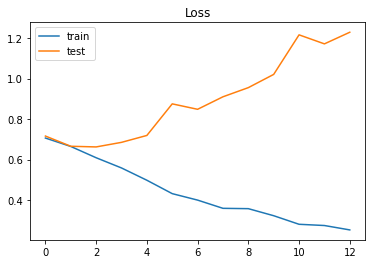

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

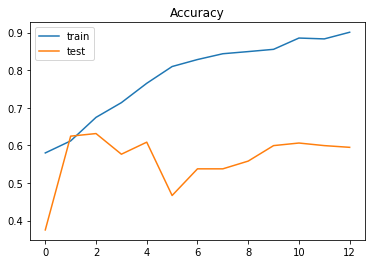

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
X_test

1243                            kasihan nungu yah resulta
3154    berani lakilaki berani rumah gadis suka duduk ...
4323    malam pojok pilih jalan dapet dm kalo udah nia...
3864                           parah wonhee cantik banget
28      gimana nilai dr jilbabsyaringgak kadang gemez ...
                              ...                        
1761    gw sh sbnrnya susah banget nih lepas dr sedot ...
32      sungguh cinta berat pisah hadiahperasaan bikin...
3894    giat kantor pusat rencana tgl pulang tiket pul...
218     terima kasih tertawa moga amal soleh mulia ham...
3555    kadang suka gak terima kalo liat hidup we gak ...
Name: tweet, Length: 438, dtype: object

In [ ]:
X_test.to_list()[0]

'kasihan nungu yah resulta'

In [ ]:
new_tweet = X_test.to_list()
seq = tokenizer.texts_to_sequences(new_tweet)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['sentiment']

In [ ]:
pred.shape

(438, 1)

In [ ]:
for i, j in enumerate(pred):
  pred[i] = np.rint(j)
y_test_pred = pred.astype(int)

In [ ]:
y_test

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,